In [7]:
#  bard가 제시한 에러 해결 코드
import tqdm

# 에러 발생 코드
for i in tqdm(range(100)):
    pass

# 에러 해결 코드
for i in tqdm(range(100)):
    pass

TypeError: 'module' object is not callable

In [6]:
import torch
import torchvision
from torchvision import transforms

# 데이터셋 다운로드 및 로드
train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    # bard가 제시한 에러 해결 코드
    tqdm_callback=tqdm.tqdm_notebook(
        total=len(train_dataset), unit="img", unit_scale=True, leave=True
    ),
)
test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    # bard가 제시한 에러 해결 코드
    tqdm_callback=tqdm.tqdm_notebook(
        total=len(test_dataset), unit="img", unit_scale=True, leave=True
    ),
)

# 데이터셋 텐서화
train_data = train_dataset.data.float()
train_labels = train_dataset.targets
test_data = test_dataset.data.float()
test_labels = test_dataset.targets

# 모델 생성
model = torchvision.models.resnet18(pretrained=True)

# 모델 학습
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(10):
    train_outputs = model(train_data)
    loss = criterion(train_outputs, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 모델 평가
test_outputs = model(test_data)
_, predicted = torch.max(test_outputs, 1)
correct = (predicted == test_labels).sum().item()
accuracy = correct / len(test_data)

# 제출 파일 생성
submission = pd.DataFrame({"ImageId": test_labels, "Label": predicted})
submission.to_csv("submission.csv", index=False)


/tmp/ipykernel_582/1175530452.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_callback=tqdm.tqdm_notebook(
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'

6번 줄에서 "AttributeError: 'FloatProgress' object has no attribute 'style'" 에러 발생
- Bard에게 "위의 코드 실행 중 AttributeError: 'FloatProgress' object has no attribute 'style' 에러가 발생했어. 에러를 해결 해 줘" 프롬프트 실행

# 1회차 결과
- 오류로 인해 실행 불가
- 에러 해결에 관해 프롬프트를 생성하였으나, bard가 제시한 코드는 에러를 해결하지 못함
- chat gpt에는 없던 참고 문헌(깃허브) 링크를 제공함
- 참고 문헌의 분석 결과, 코드 참고의 비율이 높지 않은 것으로 간주 됨
- 참고 깃허브 : https://github.com/Laifat/Homework

In [8]:
# 2회차
# digit recognizer에 제출할 파이썬 코드가 필요. 단, 코드 실행 시 accuracy가 0.97 이상 가질 것
import tensorflow as tf

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


2024-01-01 15:24:46.368931: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 15:24:46.369060: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 15:24:46.369131: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 15:24:46.374542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Exception ignored in: <function tqdm.__del__ at 0x

Epoch 1/10


2024-01-01 15:25:01.259890: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-01-01 15:25:01.510646: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f578677a580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-01 15:25:01.510678: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-01-01 15:25:01.515425: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-01 15:25:01.593888: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 24s 9ms/step - loss: 0.1321 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0098 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0074 - accu

Bard가 제공한 참고 링크
- github.com/Astromium/handwritten_digits_recognition
- jeande.medium.com/a-typical-convolutional-neural-network-cnn-architecture-3d19335d4499
- blog.knoldus.com/convolutional-neural-network-in-tensorflow/
- velog.io/@cualquier/220715TIL-Convolutional-Neural-Network-CNN

In [9]:
# "위에서 생성한 모델을 캐글에 csv 파일로 제출할 수 있는 코드가 필요"의 프롬프트에 대해 bard가 생성한 답변
#  바로 위의 코드와 동일한 코드와 함께 생성되었으나, 사용자가 임의로 필요한 부분만 사용함

# 테스트 데이터 예측
y_pred = model.predict(x_test)

# csv 파일로 저장
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred.argmax(axis=1)
})
submission.to_csv('submission.csv', index=False)

313/313 [==============================] - 0s 1ms/step


In [14]:
print(len(y_pred))

10000


# 2회차 결과
- 모델 정확도 (Test accuracy) : 0.9884
- kaggle score : "Error" 발생
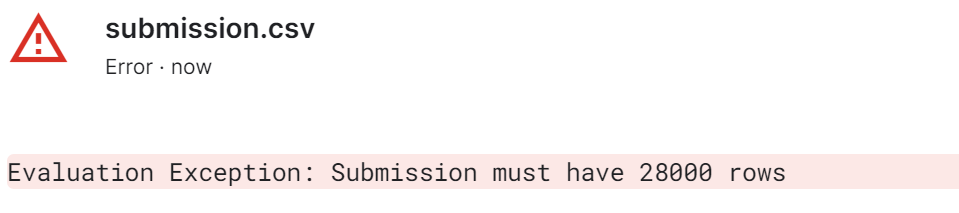
- 확인 결과, 예측 결과가 28,000개가 아닌 10,000개로 확인 (제출용 csv 파일의 양식에 어긋남)
- kaggle에 제출할 파일을 생성하는 코드가 생성되지 않아, 추가로 생성이 필요했음

In [17]:
import tensorflow as tf

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# GPU 사용 설정
model.build(input_shape=(None, 28, 28, 1)) 
# 파라미터로 use_bias = False로 설정 되어 있었으나, 존재하지 않는 파라미터로 판단
# 사용자가 임의로 삭제함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# 테스트 데이터 예측
y_pred = model.predict(x_test)

# csv 파일로 저장
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred.argmax(axis=1)
})
submission.to_csv('submission.csv', index=False)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2050 - accuracy: 0.9408 - val_loss: 0.0544 - val_accuracy: 0.9831
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0346 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0396 - val_accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0330 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0336 - val_accuracy: 0.9896
Epoch 

Bard 제공 참고 문헌 링크
- github.com/Astromium/handwritten_digits_recognition
- jeande.medium.com/a-typical-convolutional-neural-network-cnn-architecture-3d19335d4499
- blog.knoldus.com/convolutional-neural-network-in-tensorflow/
- github.com/Jiyooung/TensorFlow_Certificate

# 3회차 결과
- gpu 사용 확인
- Test accuracy : 0.9894
- Test accuracy에 경우, 2회차 대비 1.16% 향상
- kaggle score : 확인 못함
- 2회차와 동일하게 형식을 맞추지 못하는 오류가 확인 됨